<a href="https://colab.research.google.com/github/UmeshGayashan/Emotion_Detection_Model/blob/master/Emotion_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link with Kaggle

In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
amanbarthwal/steam-store-data                                   Steam Store Data                                      6MB  2024-05-25 06:23:06            865         24  1.0              
dem0nking/mobile-games-android-and-ios-rating-dataset           Mobile Games (Android and IOS) Rating Dataset         2KB  2024-05-25 13:26:55            946         33  1.0              
jainaru/parkinson-disease-detection                             Parkinson Disease Detection                          16KB  2024-05-27 15:51:16            857         26  1.0              
rohit265/credit-card-eligibility-data-determining-factors   

In [7]:
! kaggle datasets download 'jonathanoheix/face-expression-recognition-dataset'

Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
License(s): unknown
 85% 103M/121M [00:00<00:00, 184MB/s] 
100% 121M/121M [00:00<00:00, 163MB/s]


In [8]:
! unzip face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [10]:
folder_path = "images/"

In [11]:
BATCH_SIZE = 128
IMAGE_SIZE = 48
# CHANNELS=3
# EPOCHS=50
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "images/train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 28821 files belonging to 7 classes.


In [12]:
class_names = train_dataset.class_names
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [13]:
# Get the number of classes (unique target labels)
num_classes = len(set(train_dataset.class_names))

# Print the number of classes
print("Number of classes:", num_classes)

Number of classes: 7


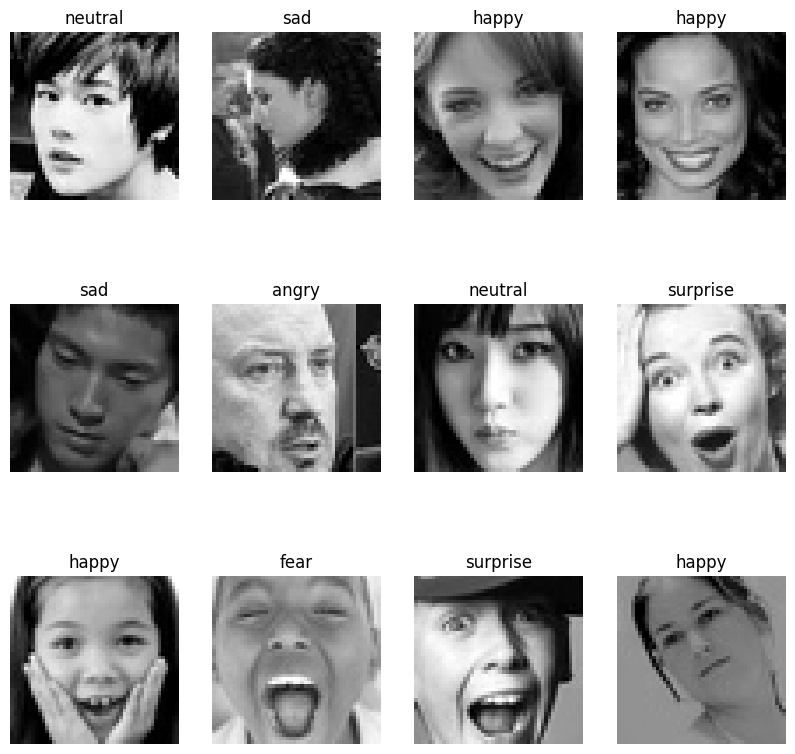

In [14]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

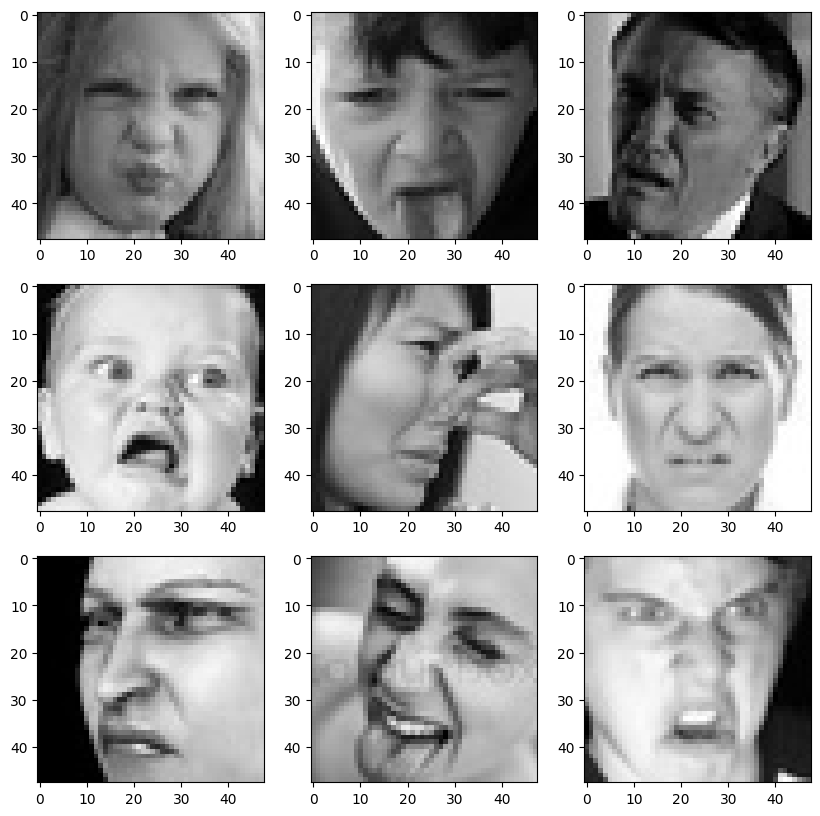

In [15]:
expression = 'disgust'

plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(IMAGE_SIZE, IMAGE_SIZE))
    plt.imshow(img)
plt.show()

In [16]:
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                              color_mode = "grayscale",
                                              batch_size=BATCH_SIZE,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                              color_mode = "grayscale",
                                              batch_size=BATCH_SIZE,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [17]:
from keras.optimizers import Adam,SGD,RMSprop

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization()) # improve training stability by normalizing the activations of the previous layer.
model.add(Activation('relu')) # non-linearity
model.add(MaxPooling2D(pool_size = (2,2))) # reduce dimensionality --> Max pooling --> Maximum Value
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same')) # extract features from the images
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2))) # downsampling by taking the maximum value from a 2x2 grid of pixels
model.add(Dropout (0.25)) #  randomly drops 25% of the activations during training, helping prevent overfitting.

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same')) # Number of filters (e.g., 64, 128, etc.): This specifies the number of feature maps the layer will learn.

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same')) # Kernel size (e.g., (3,3), (5,5)): This defines the size of the filter used for convolution.
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) # flattens the output of the convolutional layers into a 1D vector suitable for feeding into fully connected layers.

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(num_classes, activation='softmax'))



opt = Adam(learning_rate=  0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [32]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate= 2.5600002118153498e-09),
              metrics=['accuracy'])

In [33]:
history = model.fit(train_set,
                    steps_per_epoch=train_set.n // train_set.batch_size,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=test_set.n // test_set.batch_size,
                    callbacks=callbacks_list)

Epoch 1/48
225/225 [==============================] - ETA: 0s - loss: 0.6862 - accuracy: 0.7437

225/225 [==============================] - 21s 78ms/step - loss: 0.6862 - accuracy: 0.7437 - val_loss: 0.9779 - val_accuracy: 0.6548 - lr: 2.5600e-09
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 0.6904 - accuracy: 0.7410

225/225 [==============================] - 17s 76ms/step - loss: 0.6904 - accuracy: 0.7410 - val_loss: 0.9776 - val_accuracy: 0.6554 - lr: 2.5600e-09
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.7421

225/225 [==============================] - 16s 72ms/step - loss: 0.6915 - accuracy: 0.7421 - val_loss: 0.9779 - val_accuracy: 0.6548 - lr: 2.5600e-09
Epoch 4/48
225/225 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.7443

225/225 [==============================] - 16s 72ms/step - loss: 0.6861 - accuracy: 0.7443 - val_loss: 0.9780 - val_accuracy: 0.6560 - lr: 2.5600e-09
Epoch 5/48
225/225 [==============================] - ETA: 0s - loss: 0.6910 - accuracy: 0.7445

225/225 [==============================] - 16s 72ms/step - loss: 0.6910 - accuracy: 0.7445 - val_loss: 0.9773 - val_accuracy: 0.6558 - lr: 2.5600e-09
Epoch 6/48
225/225 [==============================] - ETA: 0s - loss: 0.6954 - accuracy: 0.7399

225/225 [==============================] - 16s 72ms/step - loss: 0.6954 - accuracy: 0.7399 - val_loss: 0.9781 - val_accuracy: 0.6544 - lr: 2.5600e-09
Epoch 7/48
225/225 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.7399

225/225 [==============================] - 17s 76ms/step - loss: 0.6938 - accuracy: 0.7399 - val_loss: 0.9778 - val_accuracy: 0.6547 - lr: 2.5600e-09
Epoch 8/48
225/225 [==============================] - ETA: 0s - loss: 0.6901 - accuracy: 0.7408Restoring model weights from the end of the best epoch: 5.



Epoch 8: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
225/225 [==============================] - 17s 73ms/step - loss: 0.6901 - accuracy: 0.7408 - val_loss: 0.9775 - val_accuracy: 0.6555 - lr: 2.5600e-09
Epoch 8: early stopping
